In [1]:
# PASSO 1.1: Importar as bibliotecas essenciais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PASSO 1.2: Carregar o arquivo de dados para um DataFrame
df_titanic = pd.read_csv('train.csv')

# PASSO 1.3: Exibir as 5 primeiras linhas do nosso DataFrame
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# O comando .info() nos dá um resumo técnico do DataFrame
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


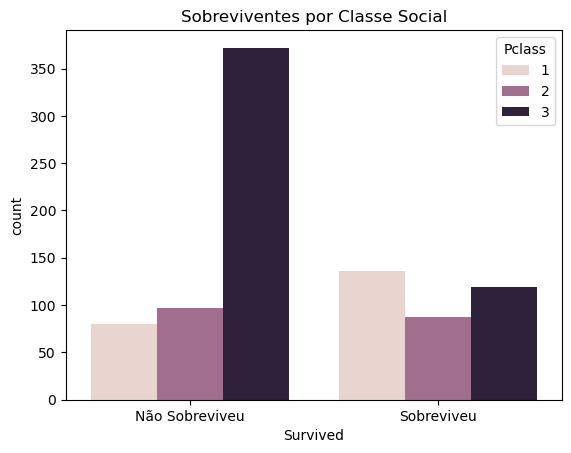

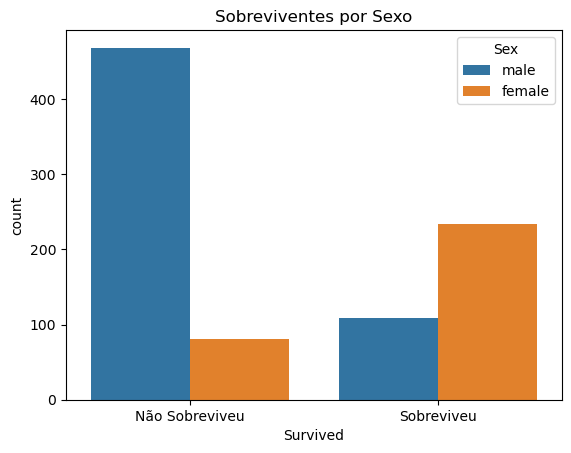

In [4]:
# Pergunta 1: A classe social influenciou na sobrevivência?
# Usamos o Seaborn (sns) para criar um gráfico de contagem.
# hue='Pclass' cria barras separadas para cada classe social.
sns.countplot(x='Survived', hue='Pclass', data=df_titanic)
plt.title('Sobreviventes por Classe Social')
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu']) # Melhora os rótulos do eixo X
plt.show() # Exibe o primeiro gráfico

# Pergunta 2: O sexo foi um fator decisivo?
# Criamos um segundo gráfico da mesma forma.
sns.countplot(x='Survived', hue='Sex', data=df_titanic)
plt.title('Sobreviventes por Sexo')
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'])
plt.show() # Exibe o segundo gráfico

In [6]:
# PASSO 4.1: Calcular a idade média dos passageiros
# O .mean() calcula a média de uma coluna numérica
idade_media = df_titanic['Age'].mean()

print(f"A idade média dos passageiros é: {idade_media:.2f} anos") # O :.2f formata para 2 casas decimais

# PASSO 4.2: Preencher os valores vazios na coluna 'Age' com a média
# O .fillna() é o comando para preencher dados faltantes.
# inplace=True faz a modificação diretamente na nossa tabela df_titanic.
df_titanic['Age'].fillna(idade_media, inplace=True)

# PASSO 4.3: Verificar se a limpeza funcionou
# Rodamos o .info() de novo para confirmar que 'Age' agora não tem mais dados nulos.
print("\nVerificando a tabela após a limpeza:")
df_titanic.info()

A idade média dos passageiros é: 29.70 anos

Verificando a tabela após a limpeza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/tmp/ipykernel_6829/726085391.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['Age'].fillna(idade_media, inplace=True)


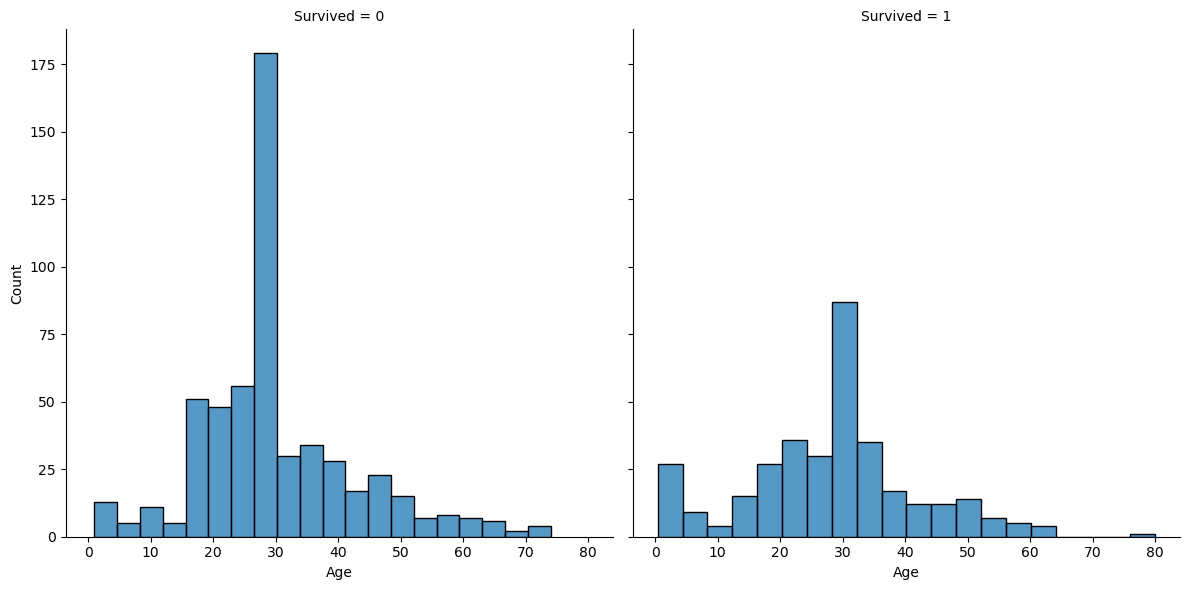

In [7]:
# Criamos uma "grade" de gráficos com o FacetGrid, separando por 'Survived'
g = sns.FacetGrid(df_titanic, col='Survived', height=6)

# Em cada gráfico da grade, desenhamos um histograma da idade
# Um histograma mostra a distribuição, ou seja, onde se concentram os passageiros de cada idade
g.map(sns.histplot, 'Age', bins=20)

plt.show()